In [59]:
import pandas as pd
import numpy as np
import gc
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import july
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "iframe"

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
data_path = 'flights/'

# Read data:
flights = pd.read_csv(data_path + 'flights.csv')
cancel_codes = pd.read_csv(data_path + 'cancellation_codes.csv')

/var/folders/nk/t5z7q8qd4tl_77c0h7vqg7nm0000gn/T/ipykernel_23982/3331379462.py:4: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv(data_path + 'flights.csv')


In [3]:
flights.shape

(1099444, 110)

In [4]:
# Check out NaNs in the dataset:
flights.isna().sum()

year                                     0
quarter                                  0
month                                    0
dayofmonth                               0
dayofweek                                0
flightdate                               0
reporting_airline                        0
dot_id_reporting_airline                 0
iata_code_reporting_airline              0
tail_number                           3255
flight_number_reporting_airline          0
originairportid                          0
originairportseqid                       0
origincitymarketid                       0
origin                                   0
origincityname                           0
originstate                              0
originstatefips                          0
originstatename                          0
originwac                                0
destairportid                            0
destairportseqid                         0
destcitymarketid                         0
dest       

In [5]:
# Drop columns with all null values:
flights.drop(columns = flights.columns[-25:], inplace=True)

In [6]:
# Convert flightdate to datetime:
flights['flightdate'] = pd.to_datetime(flights['flightdate'], format="%Y-%m-%d")

In [7]:
# Get the date range:
print(flights['flightdate'].min())
print(flights['flightdate'].max())

2021-11-01 00:00:00
2021-12-31 00:00:00


In [8]:
# The 2 columns are exactly the same
flights[flights['reporting_airline'] != flights['iata_code_reporting_airline']].shape

(0, 85)

In [9]:
# Dropping 2 columns:
flights.drop(columns=['dot_id_reporting_airline',
             'iata_code_reporting_airline'], inplace=True)

In [10]:
# Sorting based on flightdate and reporting_airline
flights.sort_values(by = ['reporting_airline','flightdate'], ascending=True, inplace=True)
flights.head()

,year,quarter,month,dayofmonth,dayofweek,flightdate,reporting_airline,tail_number,flight_number_reporting_airline,originairportid,originairportseqid,origincitymarketid,origin,origincityname,originstate,originstatefips,originstatename,originwac,destairportid,destairportseqid,destcitymarketid,dest,destcityname,deststate,deststatefips,deststatename,destwac,crsdeptime,deptime,depdelay,depdelayminutes,depdel15,departuredelaygroups,deptimeblk,taxiout,wheelsoff,wheelson,taxiin,crsarrtime,arrtime,arrdelay,arrdelayminutes,arrdel15,arrivaldelaygroups,arrtimeblk,cancelled,cancellationcode,diverted,crselapsedtime,actualelapsedtime,airtime,flights,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,firstdeptime,totaladdgtime,longestaddgtime,divairportlandings,divreacheddest,divactualelapsedtime,divarrdelay,divdistance,div1airport,div1airportid,div1airportseqid,div1wheelson,div1totalgtime,div1longestgtime,div1wheelsoff,div1tailnum,div2airport,div2airportid,div2airportseqid,div2wheelson,div2totalgtime,div2longestgtime,div2wheelsoff,div2tailnum
857310,2021,4,11,1,1,2021-11-01,9E,N478PX,4628,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,15919,1591904,31834,XNA,"Fayetteville, AR",AR,5,Arkansas,71,1415,1409.0,-6.0,0.0,0.0,-1.0,1400-1459,19.0,1428.0,1619.0,5.0,1629,1624.0,-5.0,0.0,0.0,-1.0,1600-1659,0.0,NaN,0.0,194.0,195.0,171.0,1.0,1147.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
857335,2021,4,11,1,1,2021-11-01,9E,N478PX,4628,15919,1591904,31834,XNA,"Fayetteville, AR",AR,5,Arkansas,71,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1715,1708.0,-7.0,0.0,0.0,-1.0,1700-1759,7.0,1715.0,2027.0,6.0,2108,2033.0,-35.0,0.0,0.0,-2.0,2100-2159,0.0,NaN,0.0,173.0,145.0,132.0,1.0,1147.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
857360,2021,4,11,1,1,2021-11-01,9E,N349PQ,4630,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10868,1086803,30868,CAE,"Columbia, SC",SC,45,South Carolina,37,855,852.0,-3.0,0.0,0.0,-1.0,0800-0859,23.0,915.0,948.0,3.0,954,951.0,-3.0,0.0,0.0,-1.0,0900-0959,0.0,NaN,0.0,59.0,59.0,33.0,1.0,192.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
857399,2021,4,11,1,1,2021-11-01,9E,N153PQ,4632,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12197,1219702,31703,HPN,"White Plains, NY",NY,36,New York,22,1620,1634.0,14.0,14.0,0.0,0.0,1600-1659,23.0,1657.0,1844.0,4.0,1829,1848.0,19.0,19.0,1.0,1.0,1800-1859,0.0,NaN,0.0,129.0,134.0,107.0,1.0,780.0,4,14.0,0.0,5.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
857402,2021,4,11,1,1,2021-11-01,9E,N153PQ,4633,12197,1219702,31703,HPN,"White Plains, NY",NY,36,New York,22,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1915,1919.0,4.0,4.0,0.0,0.0,1900-1959,24.0,1943.0,2146.0,6.0,2134,2152.0,18.0,18.0,1.0,1.0,2100-2159,0.0,NaN,0.0,139.0,153.0,123.0,1.0,780.0,4,0.0,0.0,18.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Tail number: registration number or aircraft registration, permanent identification mark for the aircraft
# Flight number: identify a specific flight within an airline's network, associated with a particular
# route and schedule
# Flight number - shared by multiple airlines over the years
# Tail number has some missing values:
# Unfortunately no way to impute missing values in Tail number
flights[flights['tail_number'].isna()].head()

,year,quarter,month,dayofmonth,dayofweek,flightdate,reporting_airline,tail_number,flight_number_reporting_airline,originairportid,originairportseqid,origincitymarketid,origin,origincityname,originstate,originstatefips,originstatename,originwac,destairportid,destairportseqid,destcitymarketid,dest,destcityname,deststate,deststatefips,deststatename,destwac,crsdeptime,deptime,depdelay,depdelayminutes,depdel15,departuredelaygroups,deptimeblk,taxiout,wheelsoff,wheelson,taxiin,crsarrtime,arrtime,arrdelay,arrdelayminutes,arrdel15,arrivaldelaygroups,arrtimeblk,cancelled,cancellationcode,diverted,crselapsedtime,actualelapsedtime,airtime,flights,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,firstdeptime,totaladdgtime,longestaddgtime,divairportlandings,divreacheddest,divactualelapsedtime,divarrdelay,divdistance,div1airport,div1airportid,div1airportseqid,div1wheelson,div1totalgtime,div1longestgtime,div1wheelsoff,div1tailnum,div2airport,div2airportid,div2airportseqid,div2wheelson,div2totalgtime,div2longestgtime,div2wheelsoff,div2tailnum
858516,2021,4,11,20,6,2021-11-20,9E,NaN,4684,11146,1114607,31146,CRW,"Charleston/Dunbar, WV",WV,54,West Virginia,39,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,700,NaN,NaN,NaN,NaN,NaN,0700-0759,NaN,NaN,NaN,NaN,833,NaN,NaN,NaN,NaN,NaN,0800-0859,1.0,A,0.0,93.0,NaN,NaN,1.0,363.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859693,2021,4,11,20,6,2021-11-20,9E,NaN,4743,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11146,1114607,31146,CRW,"Charleston/Dunbar, WV",WV,54,West Virginia,39,2055,NaN,NaN,NaN,NaN,NaN,2000-2059,NaN,NaN,NaN,NaN,2215,NaN,NaN,NaN,NaN,NaN,2200-2259,1.0,A,0.0,80.0,NaN,NaN,1.0,363.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874347,2021,4,11,20,6,2021-11-20,9E,NaN,5371,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11146,1114607,31146,CRW,"Charleston/Dunbar, WV",WV,54,West Virginia,39,1015,NaN,NaN,NaN,NaN,NaN,1000-1059,NaN,NaN,NaN,NaN,1134,NaN,NaN,NaN,NaN,NaN,1100-1159,1.0,A,0.0,79.0,NaN,NaN,1.0,363.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874377,2021,4,11,20,6,2021-11-20,9E,NaN,5371,11146,1114607,31146,CRW,"Charleston/Dunbar, WV",WV,54,West Virginia,39,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1400,NaN,NaN,NaN,NaN,NaN,1400-1459,NaN,NaN,NaN,NaN,1532,NaN,NaN,NaN,NaN,NaN,1500-1559,1.0,A,0.0,92.0,NaN,NaN,1.0,363.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902987,2021,4,11,1,1,2021-11-01,AA,NaN,595,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,1110,NaN,NaN,NaN,NaN,NaN,1100-1159,NaN,NaN,NaN,NaN,1411,NaN,NaN,NaN,NaN,NaN,1400-1459,1.0,A,0.0,181.0,NaN,NaN,1.0,1089.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# City to MarketCity mapping:
# Group the data by the 'Category' column and aggregate the 'Value' column as a list
grouped = flights.groupby('origincitymarketid')['origincityname'].apply(set)

# Convert the grouped data to a Python dictionary
origin_market_to_city = grouped.to_dict()

In [15]:
# Hierarchy bottom to top:
# Airport/Origin (Airportcode) - City - CityMarket- State/WAC
flights.drop(columns=['originairportseqid','originstate','originstatefips','originwac'], inplace=True)

In [16]:
# Same for destination airport points:
flights.drop(columns=['destairportseqid','deststate','deststatefips','destwac'], inplace=True)

# Airline wise analysis

In [17]:
# Take a backup copy:
flights_backup = flights.copy()

'''
del flights
gc.collect()

flights = flights_backup.copy()
'''

'\ndel flights\ngc.collect()\n\nflights = flights_backup.copy()\n'

In [18]:
# Converting scheduled departure time to time format

# Get the count of number of digit in the scheduled departure time
# Get all timestamps in the same format
flights['crsdeptime_count'] = flights['crsdeptime'].astype(str).str.count('\d')

def format_time(count_col, time_col):
    if count_col == 1:
        return datetime.strptime('000'+str(time_col), "%H%M").time()
    elif count_col == 2:
        return datetime.strptime('00'+str(time_col), "%H%M").time()
    elif count_col == 3:
        return datetime.strptime('0'+str(time_col), "%H%M").time()
    else:
        return datetime.strptime(str(time_col), "%H%M").time()
    
flights['crsdeptime'] = flights.apply(lambda x: format_time(x['crsdeptime_count'],x['crsdeptime']), axis=1)
flights.drop(columns = ['crsdeptime_count'], inplace=True)

In [19]:
# Similar operation for scheduled arrival time
flights['crsarrtime'] = flights['crsarrtime'].astype(str)
flights['crsarrtime_count'] = flights['crsarrtime'].str.count('\d')
flights['crsarrtime'] = np.where(flights['crsarrtime'] == '2400', '0000', flights['crsarrtime'])
    
flights['crsarrtime'] = flights.apply(lambda x: format_time(x['crsarrtime_count'],x['crsarrtime']), axis=1)
flights.drop(columns = ['crsarrtime_count'], inplace=True)

In [19]:
# Number of aircrafts owned by each airline:
flights_owned = flights.groupby('reporting_airline')['tail_number'].nunique().reset_index()
flights_owned.sort_values(by = 'tail_number', inplace=True)

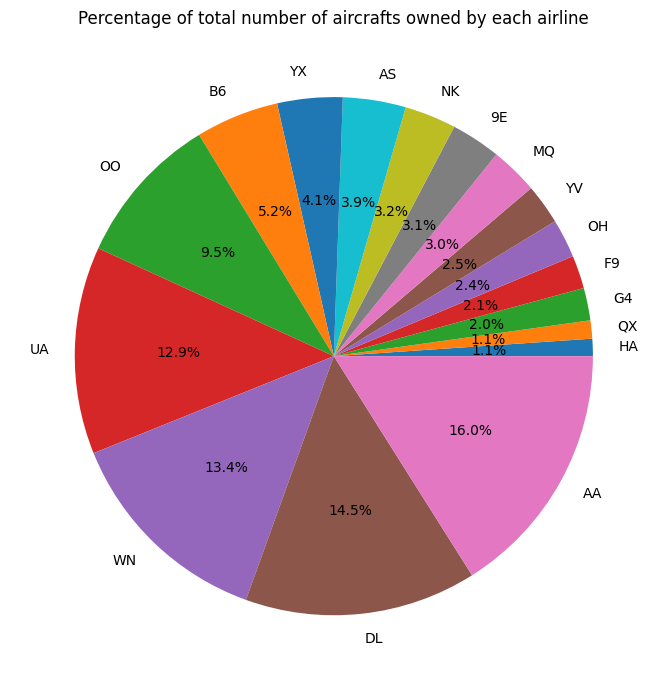

In [20]:
# Pie chart to represent the number of aircrafts owned by each airline:
# Creating plot
fig = plt.figure(figsize =(7, 7))
plt.pie(flights_owned['tail_number'], labels = flights_owned['reporting_airline'], autopct='%1.1f%%')
plt.title('Percentage of total number of aircrafts owned by each airline')
# show plot
plt.tight_layout()
plt.show()

[Text(0.5, 0, 'Airline'),
 Text(0, 0.5, 'Percentage coverage'),
 Text(0.5, 1.0, 'Percentage coverage of airports by Airlines')]

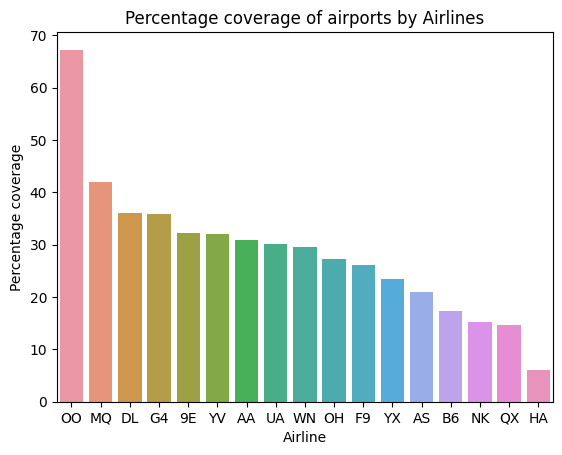

In [21]:
# How many airports do each airline cover:
airports = flights['reporting_airline'].unique()
airports_list = []

# Create a set of all available airports:
all_airports = set()
all_airports.update(flights['originairportid'].unique())
all_airports.update(flights['destairportid'].unique())

for airport in airports:
    airport_set = set()
    temp = flights[flights['reporting_airline'] == airport]
    airport_set.update(temp['originairportid'].unique())
    airport_set.update(temp['destairportid'].unique())
    airports_list.append((airport, len(airport_set)))

num_airports = pd.DataFrame(airports_list, columns=['airline', 'num_airports'])
num_airports['total_airports'] = len(all_airports)
num_airports['percent_coverage'] = num_airports['num_airports']/num_airports['total_airports'] * 100

plot = sns.barplot(data=num_airports, x="airline", y="percent_coverage",
            order=num_airports.sort_values(by = 'percent_coverage', ascending=False)['airline'])

plot.set(xlabel="Airline", ylabel="Percentage coverage",
         title='Percentage coverage of airports by Airlines')

Observations:
- OO covers significantly higher number of airports than the rest of the airlines. It almost covers 100 airports more than his nearest competitor MQ.
- HA is at bottom of the chart in terms of airports covered, which may be because it owns the least number of aircrafts.
- AA owns a significantly larger fleet (around 16% of total aircrafts) when compared to OO but covers only around 30% of total airports.
- This suggests that the flight operations for AA is concentrated to certain airports, whereas OO’s operations are spread out.

In [22]:
# Most frequent route for each airline:
flights['route'] = flights['origin'].astype(str) + '-' + flights['dest'].astype(str)
flights.groupby(['reporting_airline'])['route'].agg(pd.Series.mode).to_frame()

,route
reporting_airline,
9E,"[AGS-ATL, ATL-AGS]"
AA,MIA-LGA
AS,SEA-ANC
B6,DCA-BOS
DL,MCO-ATL
F9,MCO-PHL
G4,"[FAT-LAS, LAS-FAT]"
HA,HNL-OGG
MQ,XNA-DFW


In [23]:
# Create a separate dataframe for cancelled flights
cancelled_flights = flights[flights['cancelled'] == 1]
completed_flights = flights[flights['cancelled'] == 0]

# Create a separate dataframe for diverted flights:
diverted_flights = completed_flights[completed_flights['diverted'] == 1]
completed_flights = completed_flights[completed_flights['diverted'] == 0]

print(completed_flights.shape)
print(cancelled_flights.shape)
print(diverted_flights.shape)

(1080584, 76)
(16753, 76)
(2107, 76)


# Completed Flights Analysis

In [24]:
# Check for duplicates
key = ['flightdate', 'reporting_airline', 'tail_number', 'originairportid', 'destairportid', 'deptime', 'arrtime']
completed_flights[completed_flights.duplicated(subset=key)]

,year,quarter,month,dayofmonth,dayofweek,flightdate,reporting_airline,tail_number,flight_number_reporting_airline,originairportid,origincitymarketid,origin,origincityname,originstatename,destairportid,destcitymarketid,dest,destcityname,deststatename,crsdeptime,deptime,depdelay,depdelayminutes,depdel15,departuredelaygroups,deptimeblk,taxiout,wheelsoff,wheelson,taxiin,crsarrtime,arrtime,arrdelay,arrdelayminutes,arrdel15,arrivaldelaygroups,arrtimeblk,cancelled,cancellationcode,diverted,crselapsedtime,actualelapsedtime,airtime,flights,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,firstdeptime,totaladdgtime,longestaddgtime,divairportlandings,divreacheddest,divactualelapsedtime,divarrdelay,divdistance,div1airport,div1airportid,div1airportseqid,div1wheelson,div1totalgtime,div1longestgtime,div1wheelsoff,div1tailnum,div2airport,div2airportid,div2airportseqid,div2wheelson,div2totalgtime,div2longestgtime,div2wheelsoff,div2tailnum,route


[Text(0.5, 0, 'Airline'),
 Text(0, 0.5, 'Number of completed flights'),
 Text(0.5, 1.0, 'Airline with the maximum number of completed flights')]

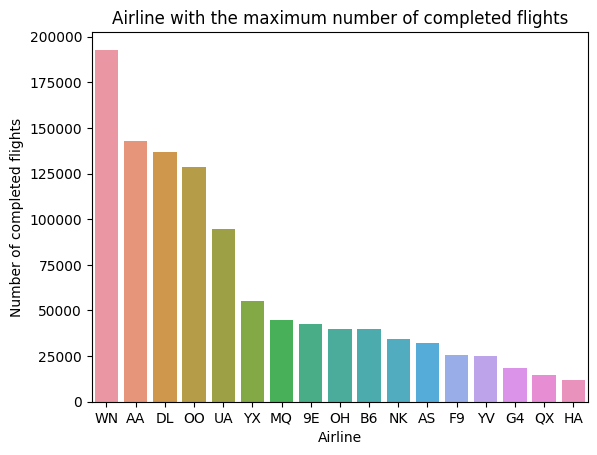

In [25]:
# Airline with the maximum number of completed flights
# NOTE: Connecting flights are counted as separate
# Ex: Houston, TX to Dallas, Tx then Dallas,Tx to Lubbock, TX - counted as 2 flights
plot = sns.countplot(data=completed_flights, x='reporting_airline',
                     order=completed_flights['reporting_airline'].value_counts().index)

plot.set(xlabel="Airline", ylabel="Number of completed flights",
         title='Airline with the maximum number of completed flights')

Observations:
- WN has completed the highest number of flights, almost close to 19000 flights during the 2 months.
- AA comes second with approximately 14000 flights, closely followed by DL.
- Although AA owns a larger fleet, WN has completed more flights. This is because AA runs on comparatively long-distance routes than WN.

In [24]:
# Maximum number of flights WN has completed on a single day:
# 28th November - Sunday after Thanksgiving
wn = completed_flights[completed_flights['reporting_airline'] == 'WN']['flightdate'].value_counts().reset_index()
print(wn['count'].max())

# Average number of flights completed each day:
print(wn['count'].mean())

3581
3161.0163934426228


In [25]:
# Even AA has the highest number of completed flights on 28th Nov 2021
aa = completed_flights[completed_flights['reporting_airline'] == 'AA']['flightdate'].value_counts().reset_index()
print(aa['count'].max())

# Average number of flights completed each day:
print(aa['count'].mean())

2670
2339.245901639344


In [26]:
# Observation:
# AA owns more flights than WN, but WN has completed more flights
# One explanation can be AA runs long distance routes more than WN
# Hence, the explanation is True
completed_flights.groupby('reporting_airline')['distance'].mean(
).reset_index().sort_values(by='distance')

,reporting_airline,distance
0,9E,409.447749
10,OH,433.849404
12,QX,448.059772
8,MQ,498.305066
11,OO,518.393185
16,YX,548.389196
15,YV,636.365987
14,WN,774.951271
6,G4,897.711365
4,DL,924.507282


Observations
- The average route distance for AA flights is around 1000 miles, in comparison to around 775 miles for WN flights.

In [27]:
# Top 10 most frequent routes:
completed_flights['route'].value_counts().head(10)

route
ORD-LGA    1830
LGA-ORD    1829
DCA-BOS    1814
BOS-DCA    1810
LAX-SFO    1707
SFO-LAX    1690
HNL-OGG    1567
OGG-HNL    1557
LAX-LAS    1548
LAX-JFK    1539
Name: count, dtype: int64

In [25]:
# Number of flights each day
completed_flights['flightdate'].value_counts().head(10)

2021-11-28    20159
2021-11-29    19920
2021-11-24    19881
2021-11-19    19445
2021-11-04    19394
2021-11-18    19377
2021-11-23    19341
2021-11-05    19319
2021-11-11    19189
2021-11-12    19119
Name: flightdate, dtype: int64

Observations:
- The highest number of flights run on a single day for both WN and AA was 28th November 2021, the Sunday just after Thanksgiving.


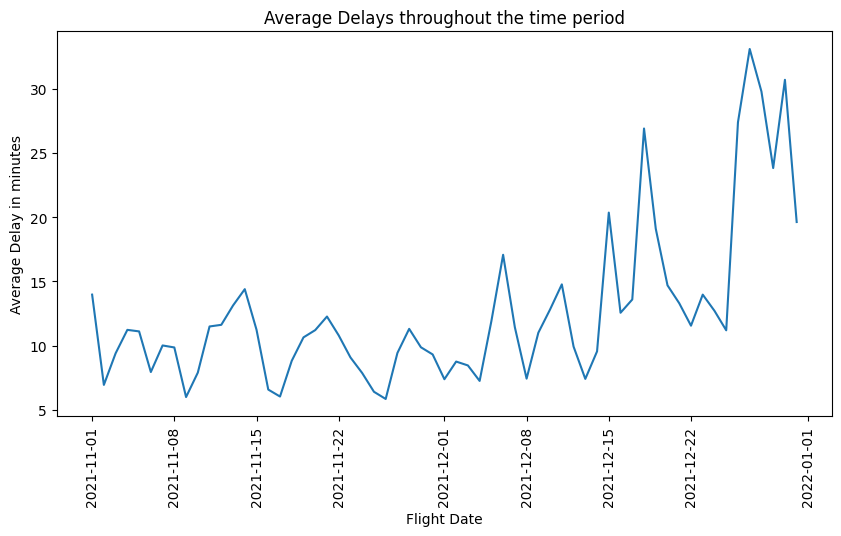

In [27]:
# Average delay each day
completed_flights[['carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay']] = completed_flights[[
    'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay']].fillna(0)
avg_delay_day = completed_flights.groupby('flightdate')[
    ['arrdelayminutes', 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay']].mean().reset_index()

# There's an increase in the delays during the last week of the year - Holiday period
fig = plt.subplots(figsize=(10, 5))
sns.lineplot(data=avg_delay_day, x='flightdate', y='arrdelayminutes')
plt.xlabel('Flight Date')
plt.ylabel('Average Delay in minutes')
plt.title('Average Delays throughout the time period')
plt.xticks(rotation=90)
plt.show()

Observations:
- The average delays across the days seem to have a cyclical nature throughout the period.
- However, the spikes in delay appear to increase during the second half of December, even though the number of flights operating don’t increase. Hence, it can be attributed to lack of ground staff due to the holiday season.

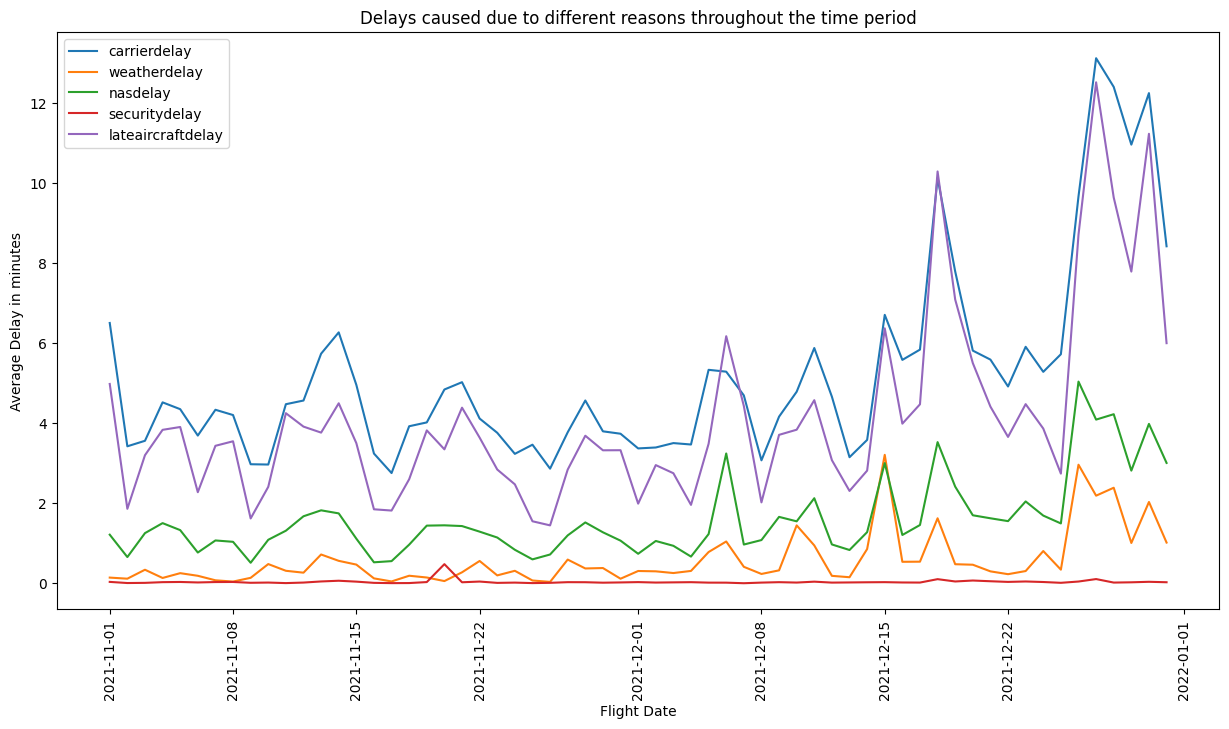

In [28]:
# Carrier delay and late aircraft delay are the most significant reasons causing delays
fig = plt.subplots(figsize=(15, 7.5))
#sns.lineplot(data=avg_delay_day, x='flightdate', y='arrdelayminutes')
sns.lineplot(data=avg_delay_day, x='flightdate', y='carrierdelay', label='carrierdelay')
sns.lineplot(data=avg_delay_day, x='flightdate', y='weatherdelay', label='weatherdelay')
sns.lineplot(data=avg_delay_day, x='flightdate', y='nasdelay', label='nasdelay')
sns.lineplot(data=avg_delay_day, x='flightdate', y='securitydelay', label='securitydelay')
sns.lineplot(data=avg_delay_day, x='flightdate', y='lateaircraftdelay', label='lateaircraftdelay')

plt.xlabel('Flight Date')
plt.ylabel('Average Delay in minutes')
plt.title('Delays caused due to different reasons throughout the time period')
plt.xticks(rotation=90)
plt.legend()
plt.show()
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

Observations:
- A major chunk of the delays come from the carrier or late aircraft side.
- NAS and weather delays also appear to follow a similar pattern of increase magnitude during the last week of December, probably due to snowfall in some of the regions.
- Security delays are consistently low and don’t contribute much to the overall delays.

<Axes: title={'center': 'Number of flights delayed during departure each day'}>

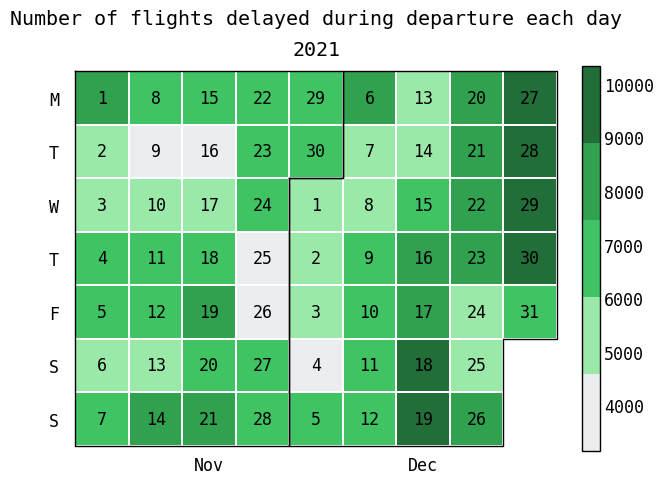

In [29]:
# Number of flights delayed each day during departure:
num_flights = completed_flights.groupby('flightdate')['depdelay'].apply(
    lambda x: (x > 0.0).sum()).reset_index()

july.heatmap(
    dates=num_flights.flightdate, # Here, osl_df is a pandas data frame.
    data=num_flights.depdelay, 
    cmap="github", 
    colorbar=True,
    date_label=True,
    weekday_label=True,
    month_grid=True,
    title="Number of flights delayed during departure each day"
)

<Axes: title={'center': 'Number of flights delayed while arriving each day'}>

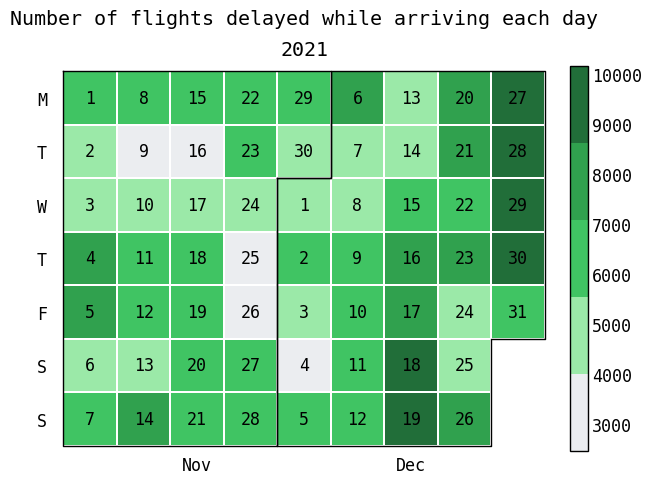

In [30]:
# Number of flights delayed each day while arrival:
num_flights = completed_flights.groupby('flightdate')['arrdelay'].apply(
    lambda x: (x > 0.0).sum()).reset_index()

july.heatmap(
    dates=num_flights.flightdate, # Here, osl_df is a pandas data frame.
    data=num_flights.arrdelay, 
    cmap="github", 
    colorbar=True,
    date_label=True,
    weekday_label=True,
    month_grid=True,
    title="Number of flights delayed while arriving each day"
)

<Axes: title={'center': 'Number of flights delayed 15 mins or more while arriving each day'}>

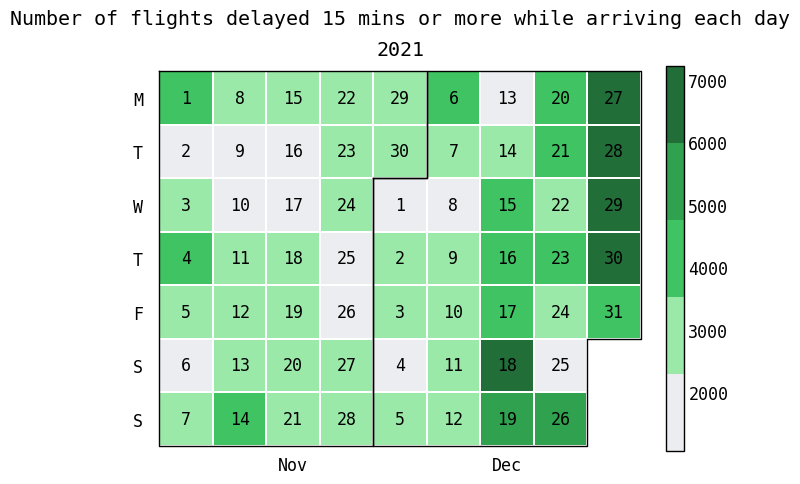

In [31]:
# Number of flights delayed 15 or more mins arrival
# Number of flights delayed each day while arrival:
num_flights = completed_flights.groupby('flightdate')['arrdel15'].apply(
    lambda x: (x == 1.0).sum()).reset_index()

july.heatmap(
    dates=num_flights.flightdate, # Here, osl_df is a pandas data frame.
    data=num_flights.arrdel15, 
    cmap="github", 
    colorbar=True,
    date_label=True,
    weekday_label=True,
    month_grid=True,
    title="Number of flights delayed 15 mins or more while arriving each day"
)

Observations:
- During the time period, for a total of 6 days the number of flights delayed each day exceeded 9000. For these same days, number of flights delayed over 15 minutes exceeded 6000.
- All the 6 days fall in the second half of December, in line with the observations made in the time plot of average delays.
- The weekdays, especially Tuesdays and Wednesdays have quite a smaller number of flights delayed when compared to the other days.
- 25th and 26th November have an abnormally low number of flights delayed. However, the number of flights arriving on those days were lower than the overall average number of flights each day.

In [33]:
# Airline wise delay groups
# Groups - Early/on-time, small, medium and large delay

delay_map = {-2: 'early/on_time',
             -1: 'early/on_time',
             0: 'early/on_time',
             1: 'small_delay',
             2: 'small_delay',
             3: 'small_delay',
             4: 'small_delay',
             5: 'medium_delay',
             6: 'medium_delay',
             7: 'medium_delay',
             8: 'medium_delay',
             9: 'large_delay',
             10: 'large_delay',
             11: 'large_delay',
             12: 'large_delay'}

completed_flights['arrivaldelaygroups_merged'] = completed_flights['arrivaldelaygroups']
completed_flights['arrivaldelaygroups_merged'].replace(delay_map, inplace=True)

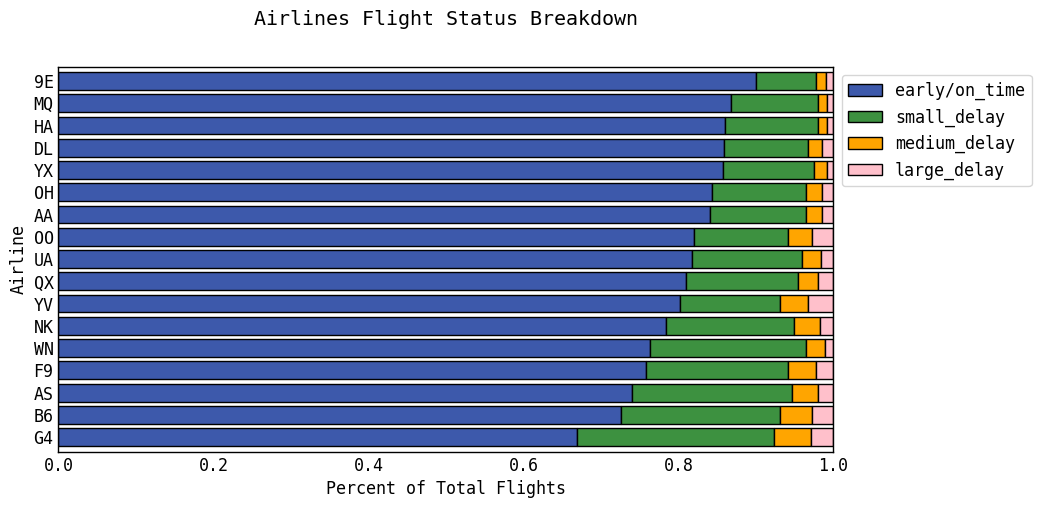

In [34]:
# Airline wise flight status of completed flights
col_order = ['early/on_time', 'small_delay', 'medium_delay', 'large_delay']
flight_delaygrp = completed_flights.groupby(["reporting_airline"])[
    "arrivaldelaygroups_merged"].value_counts(normalize=True).unstack()[col_order]

fig, ax = plt.subplots(figsize=(10, 5))
flight_delaygrp.sort_values(by='early/on_time').plot(kind='barh', stacked=True,
                                                     ax=ax, width=0.8, color=['#3D59AB', '#3D9140', 'orange', 'pink'],
                                                     edgecolor="black")
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Airlines Flight Status Breakdown")
ax.set_xlabel("Percent of Total Flights")
ax.set_ylabel("Airline")
plt.show()

Observations:
- 9E has completed the highest percentage of its flights which arrived early or on-time. MQ and HA take up the 2nd and 3rd positions, respectively.
- All the 3 airlines have a low proportion of flights which arrived after a medium delay (60-120 minutes), or large delay (>120 minutes).
- G4 ranks lowest out of all the airlines, with around 35% of all its flights being delayed to some capacity. It also has the highest proportion of flights affected by medium delay.
- WN which has completed the highest number of flights, is also ranked in the lower half, successfully completing less than 80% of all its flights early or on-time.

In [35]:
# Time categories:
# early_morning - till 6
# morning - till 12
# afternoon - till 4
# evening - till 8
# night - till 12

# Convert departure time into time_format
completed_flights['deptime'] = completed_flights['deptime'].astype(
    int).astype(str)
completed_flights['deptime_count'] = completed_flights['deptime'].str.count(
    '\d')
completed_flights['deptime'] = np.where(
    completed_flights['deptime'] == '2400', '0000', completed_flights['deptime'])
completed_flights['deptime'] = completed_flights.apply(
    lambda x: format_time(x['deptime_count'], x['deptime']), axis=1)
completed_flights.drop(columns=['deptime_count'], inplace=True)

# Converting arrival time into time_format
completed_flights['arrtime'] = completed_flights['arrtime'].astype(
    int).astype(str)
completed_flights['arrtime_count'] = completed_flights['arrtime'].str.count(
    '\d')
completed_flights['arrtime'] = np.where(
    completed_flights['arrtime'] == '2400', '0000', completed_flights['arrtime'])
completed_flights['arrtime'] = completed_flights.apply(
    lambda x: format_time(x['arrtime_count'], x['arrtime']), axis=1)
completed_flights.drop(columns=['arrtime_count'], inplace=True)

In [36]:
# Arrival:
completed_flights['arrhour'] = completed_flights['arrtime'].apply(
    lambda x: x.hour)
completed_flights['arrtimegrp'] = pd.cut(completed_flights['arrhour'], bins=[0, 6, 12, 16, 20, 24],
                                         labels=['early_morning', 'morning',
                                                 'afternoon', 'evening', 'night'],
                                         include_lowest=True, right=False)

# Departure:
completed_flights['dephour'] = completed_flights['deptime'].apply(
    lambda x: x.hour)
completed_flights['deptimegrp'] = pd.cut(completed_flights['dephour'], bins=[0, 6, 12, 16, 20, 24],
                                         labels=['early_morning', 'morning',
                                                 'afternoon', 'evening', 'night'],
                                         include_lowest=True, right=False)

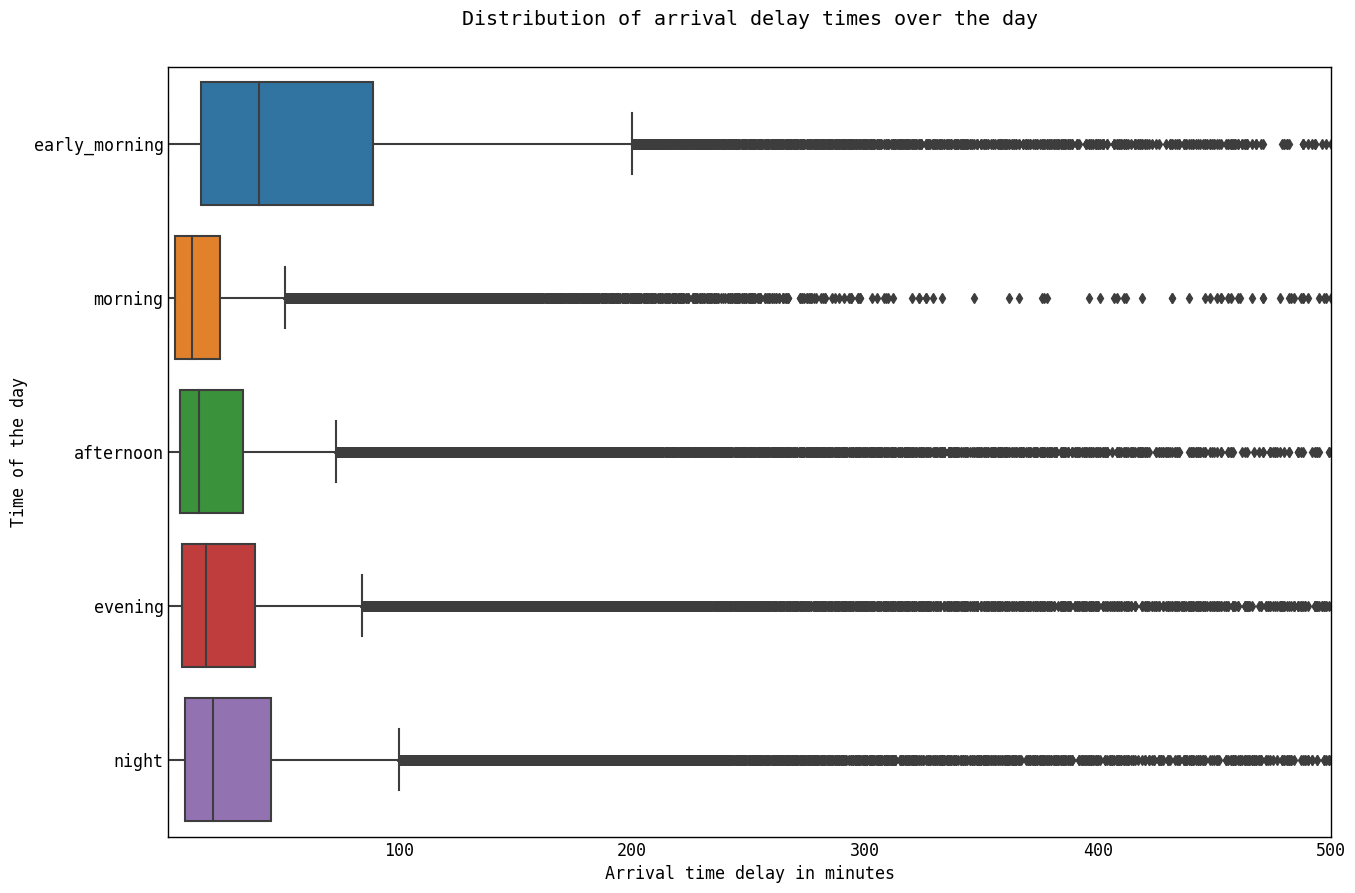

In [37]:
fig = plt.subplots(figsize=(15, 10))
sns.boxplot(data=completed_flights[completed_flights['arrdelayminutes'].between(
    0.0, 500.0, inclusive='right')], x="arrdelayminutes", y="arrtimegrp")

plt.xlabel('Arrival time delay in minutes')
plt.ylabel('Time of the day')
plt.title('Distribution of arrival delay times over the day')
plt.show()

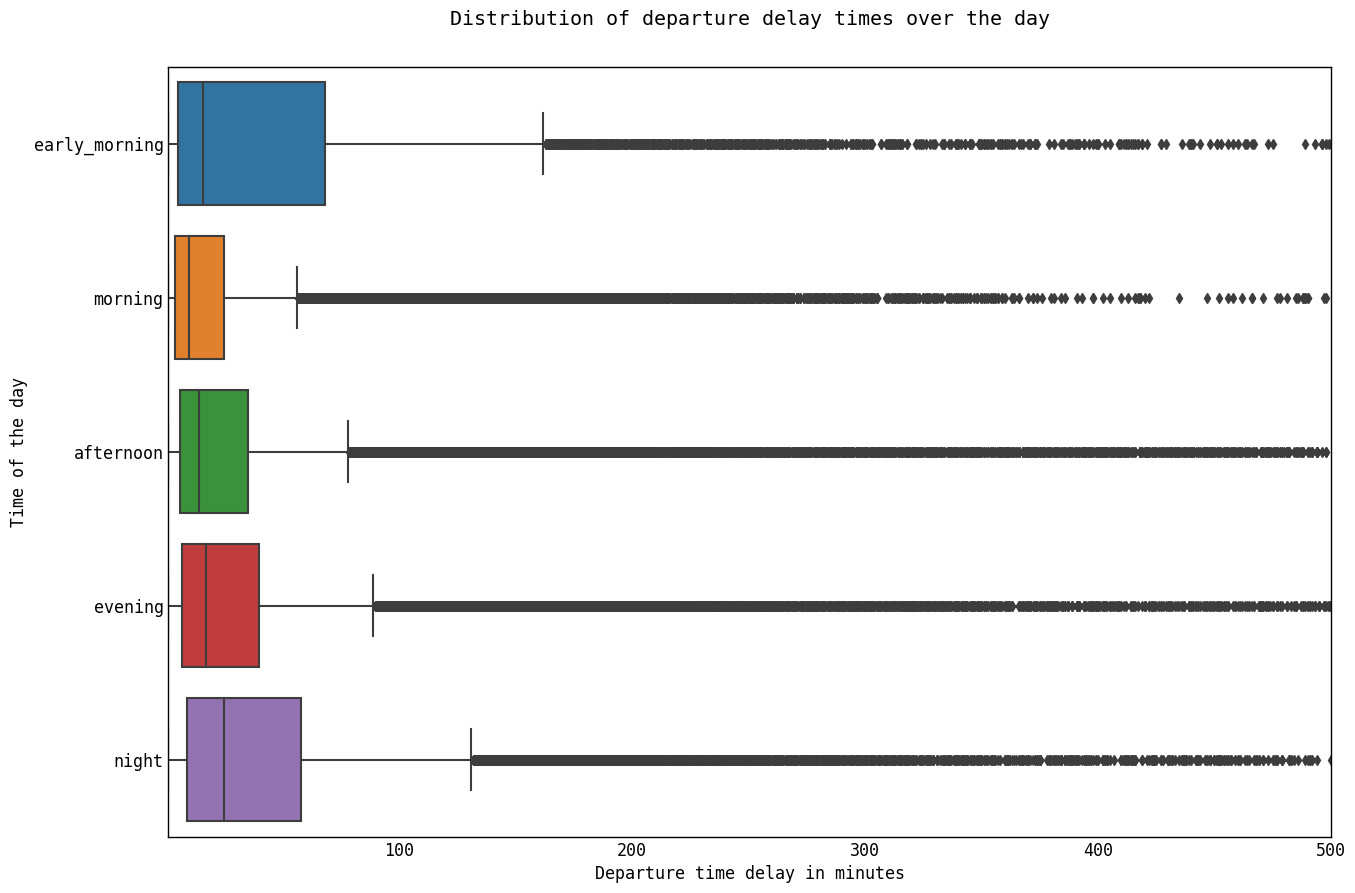

In [38]:
fig = plt.subplots(figsize=(15, 10))
sns.boxplot(data=completed_flights[completed_flights['depdelayminutes'].between(
    0.0, 500.0, inclusive='right')], x="depdelayminutes", y="deptimegrp")

plt.xlabel('Departure time delay in minutes')
plt.ylabel('Time of the day')
plt.title('Distribution of departure delay times over the day')
plt.show()

Observations:
- When taking flights, one should avoid flights departing early morning (12am – 6am) and night (8pm-Midnight).
- Also, flights arriving during these time frames are more prone to delays, in comparison to morning, afternoon or evening arrival flights.
- The morning time zone (6am – 12pm) is the prefect time for departing and landing flights.
- Ideally, one should try to book a flight which starts in the morning and arrives in its destination by evening to minimize delays.

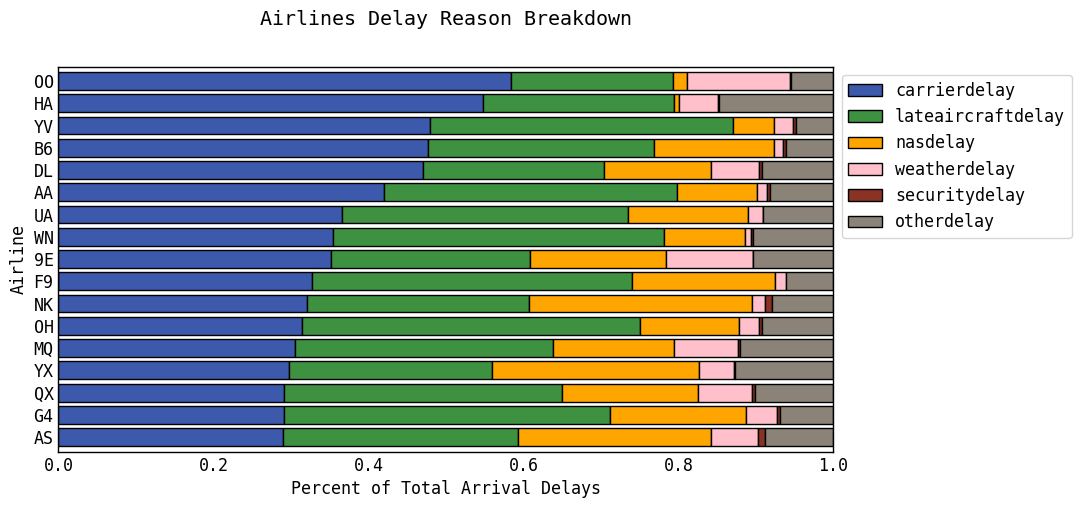

In [43]:
# Airlines vs different types of delays
# NOTE: other_delays include departure delays for cases when it is not included in carrier/lateaircraft delay
completed_flights['alldelaysadded'] = completed_flights['carrierdelay']+completed_flights['weatherdelay'] + \
    completed_flights['nasdelay']+completed_flights['securitydelay'] + \
    completed_flights['lateaircraftdelay']
completed_flights['otherdelay'] = completed_flights['arrdelayminutes'] - \
    completed_flights['alldelaysadded']

flight_delaytype = completed_flights.groupby('reporting_airline')[
    ['arrdelayminutes', 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay', 'otherdelay']].sum()

flight_delaytype['carrierdelay'] = flight_delaytype['carrierdelay'] / \
    flight_delaytype['arrdelayminutes']
flight_delaytype['weatherdelay'] = flight_delaytype['weatherdelay'] / \
    flight_delaytype['arrdelayminutes']
flight_delaytype['nasdelay'] = flight_delaytype['nasdelay'] / \
    flight_delaytype['arrdelayminutes']
flight_delaytype['securitydelay'] = flight_delaytype['securitydelay'] / \
    flight_delaytype['arrdelayminutes']
flight_delaytype['lateaircraftdelay'] = flight_delaytype['lateaircraftdelay'] / \
    flight_delaytype['arrdelayminutes']
flight_delaytype['otherdelay'] = flight_delaytype['otherdelay'] / \
    flight_delaytype['arrdelayminutes']

flight_delaytype.drop(columns=['arrdelayminutes'], inplace=True)
flight_delaytype = flight_delaytype.reindex(
    columns=['carrierdelay', 'lateaircraftdelay', 'nasdelay', 'weatherdelay', 'securitydelay', 'otherdelay'])

fig, ax = plt.subplots(figsize=(10, 5))
flight_delaytype.sort_values(by=['carrierdelay', 'lateaircraftdelay']).plot(kind='barh', stacked=True,
                                                                            ax=ax, width=0.8, color=['#3D59AB', '#3D9140', 'orange', 'pink', '#8A3324', '#8B8378'],
                                                                            edgecolor="black")
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Airlines Delay Reason Breakdown")
ax.set_xlabel("Percent of Total Arrival Delays")
ax.set_ylabel("Airline")
plt.show()

Observations:
- Considering carrier and late aircraft delays are the ones that can be controlled by the airline, YV performs the worst, closely followed by HA, OO and AA.
- YX suffers the highest amount of delay due to uncontrollable reasons like National Air System, weather and other delays. It is closed followed by AS, NK and 9E.
- NK has a major chunk of its delay coming due to the National Air System, whereas the airline suffering the most due to weather delays is OO.
- The most frequent route for OO is LAX-SFO, which is very prone to weather delays.

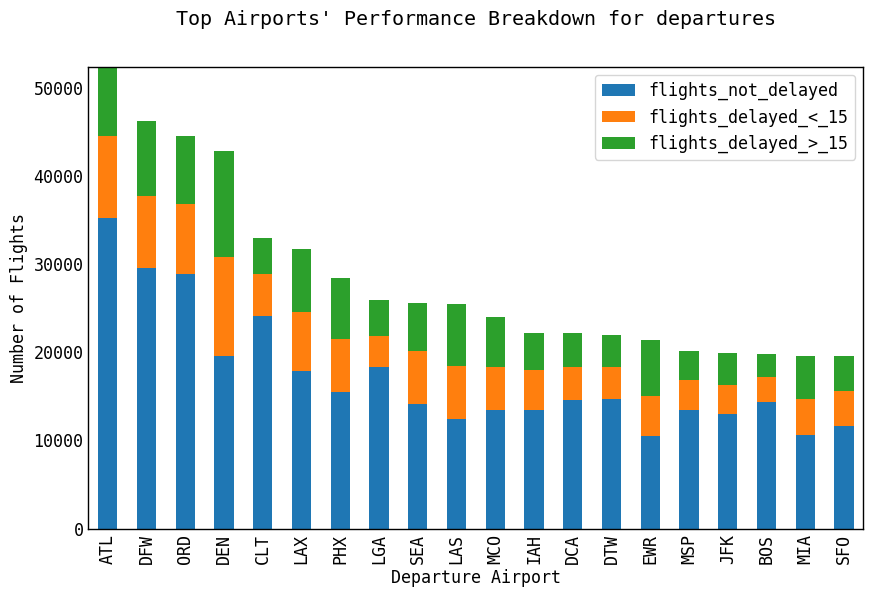

In [41]:
# Top 20 airports- statistics of delayed flights - departure and arrival side
# Departure
# Consider airports which have atleast run 1000 flights during the entire time period

airports = completed_flights.origin.value_counts().reset_index()
airports.columns = ['origin', 'count']
airports = airports[airports['count'] >= 1000]

dep_airports = completed_flights[completed_flights['origin'].isin(
    airports['origin'])]
flights_per_airport = dep_airports.groupby(
    'origin').size().reset_index()
flights_per_airport.columns = ['origin','flight_count']

delayed_flights = dep_airports.groupby('origin')['depdelayminutes'].apply(
    lambda x: (x > 0.0).sum()).reset_index()
delayed15_flights = dep_airports.groupby('origin')['depdel15'].apply(
    lambda x: (x == 1.0).sum()).reset_index()

# Merge all 3 dataframes together:
flights_per_airport = flights_per_airport.merge(delayed_flights, on='origin', how='left')
flights_per_airport = flights_per_airport.merge(delayed15_flights, on='origin', how='left')

# Create new columns
flights_per_airport['not_delayed'] = flights_per_airport['flight_count'] - flights_per_airport['depdelayminutes']
flights_per_airport['depdelayless15'] = flights_per_airport['depdelayminutes'] - flights_per_airport['depdel15']

#flights_per_airport.drop(columns = ['flight_count','depdelayminutes'], inplace=True)
flights_per_airport.rename(columns = {'depdel15':'flights_delayed_>_15',
                                      'not_delayed':'flights_not_delayed',
                                     'depdelayless15':'flights_delayed_<_15',
                                     'origin':'airport'}, inplace=True)

flights_per_airport.sort_values(by='flight_count', ascending=False, inplace=True)
plot_df = flights_per_airport[['airport', 'flights_not_delayed',
                               'flights_delayed_<_15', 'flights_delayed_>_15']].head(20)
fig, ax = plt.subplots(figsize=(10, 6.0))
plot_df.plot(x='airport', kind='bar', stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airports' Performance Breakdown for departures")
ax.set_xlabel("Departure Airport")
ax.set_ylabel("Number of Flights")
plt.show()

In [42]:
# Calculate percentage:
flights_per_airport['flights_not_delayed'] = flights_per_airport['flights_not_delayed'] / \
    flights_per_airport['flight_count']
flights_per_airport['flights_delayed_<_15'] = flights_per_airport['flights_delayed_<_15'] / \
    flights_per_airport['flight_count']
flights_per_airport['flights_delayed_>_15'] = flights_per_airport['flights_delayed_>_15'] / \
    flights_per_airport['flight_count']
flights_per_airport.head(20)

,airport,flight_count,depdelayminutes,flights_delayed_>_15,flights_not_delayed,flights_delayed_<_15
3,ATL,52377,17162,0.150448,0.672337,0.177215
27,DFW,46236,16718,0.184467,0.638420,0.177113
79,ORD,44509,15622,0.172167,0.649015,0.178818
26,DEN,42767,23160,0.280450,0.458461,0.261089
19,CLT,32951,8883,0.123881,0.730418,0.145701
56,LAX,31729,13846,0.224621,0.563617,0.211762
85,PHX,28390,12899,0.241106,0.545650,0.213244
58,LGA,25955,7687,0.160778,0.703834,0.135388
103,SEA,25604,11495,0.213795,0.551047,0.235159
55,LAS,25424,12960,0.277022,0.490245,0.232733


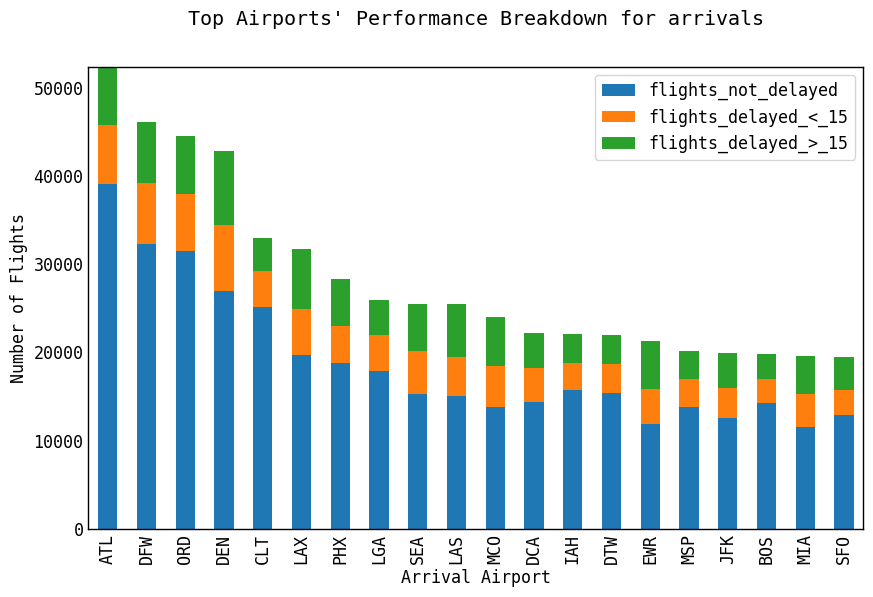

In [43]:
# Same for arrival, destination airports

airports = completed_flights.dest.value_counts().reset_index()
airports.columns = ['dest', 'count']
airports = airports[airports['count'] >= 1000]

arr_airports = completed_flights[completed_flights['dest'].isin(
    airports['dest'])]
flights_per_airport = arr_airports.groupby(
    'dest').size().reset_index()
flights_per_airport.columns = ['dest','flight_count']

delayed_flights = arr_airports.groupby('dest')['arrdelayminutes'].apply(
    lambda x: (x > 0.0).sum()).reset_index()
delayed15_flights = arr_airports.groupby('dest')['arrdel15'].apply(
    lambda x: (x == 1.0).sum()).reset_index()

# Merge all 3 dataframes together:
flights_per_airport = flights_per_airport.merge(delayed_flights, on='dest', how='left')
flights_per_airport = flights_per_airport.merge(delayed15_flights, on='dest', how='left')

# Create new columns
flights_per_airport['not_delayed'] = flights_per_airport['flight_count'] - flights_per_airport['arrdelayminutes']
flights_per_airport['arrdelayless15'] = flights_per_airport['arrdelayminutes'] - flights_per_airport['arrdel15']
'''
# Calculate percentage:
flights_per_airport['not_delayed'] = flights_per_airport['not_delayed'] / flights_per_airport['flight_count']
flights_per_airport['depdelayless15'] = flights_per_airport['depdelayless15'] / flights_per_airport['flight_count']
flights_per_airport['depdel15'] = flights_per_airport['depdel15'] / flights_per_airport['flight_count']
'''

#flights_per_airport.drop(columns = ['flight_count','depdelayminutes'], inplace=True)
flights_per_airport.rename(columns = {'arrdel15':'flights_delayed_>_15',
                                      'not_delayed':'flights_not_delayed',
                                     'arrdelayless15':'flights_delayed_<_15',
                                     'dest':'airport'}, inplace=True)

flights_per_airport.sort_values(by='flight_count', ascending=False, inplace=True)
plot_df = flights_per_airport[['airport', 'flights_not_delayed',
                               'flights_delayed_<_15', 'flights_delayed_>_15']].head(20)
fig, ax = plt.subplots(figsize=(10, 6.0))
plot_df.plot(x='airport', kind='bar', stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airports' Performance Breakdown for arrivals")
ax.set_xlabel("Arrival Airport")
ax.set_ylabel("Number of Flights")
plt.show()

In [44]:
# Calculate percentage:
flights_per_airport['flights_not_delayed'] = flights_per_airport['flights_not_delayed'] / \
    flights_per_airport['flight_count']
flights_per_airport['flights_delayed_<_15'] = flights_per_airport['flights_delayed_<_15'] / \
    flights_per_airport['flight_count']
flights_per_airport['flights_delayed_>_15'] = flights_per_airport['flights_delayed_>_15'] / \
    flights_per_airport['flight_count']
flights_per_airport.head(20)

,airport,flight_count,arrdelayminutes,flights_delayed_>_15,flights_not_delayed,flights_delayed_<_15
3,ATL,52428,13369,0.126726,0.745003,0.128271
27,DFW,46166,13859,0.151129,0.699801,0.149071
80,ORD,44535,12995,0.148445,0.708207,0.143348
26,DEN,42829,15874,0.195779,0.629363,0.174858
19,CLT,32929,7836,0.113881,0.762033,0.124085
57,LAX,31716,11979,0.213804,0.622304,0.163892
86,PHX,28363,9611,0.188979,0.661143,0.149878
59,LGA,25942,8065,0.155115,0.689114,0.155771
104,SEA,25537,10262,0.209892,0.598152,0.191957
56,LAS,25434,10398,0.233231,0.591177,0.175592


Observations:
- Considering airports from which at least 1000 flights have taken-off and landed on, ATL has the highest volume of flights completed on time both during departure and arrival.
- For departures, CLT has the highest proportion with around 73% of all its flights departing early or on-time. On the other hand, DEN performs the worst with only 45% of its flights taking off on-time.
- With regards to arrivals, CLT again has the highest proportion of flights arriving on-time (76%), closely contested by ATL and BOS in 2nd and 3rd positions, respectively.
- EWR was graded the lowest as around 45% of all flights arriving in the airport were delayed to some extent.

In [45]:
# How do the Top 10 airports compare in terms of median departure and arrival delays:
top_10 = flights_per_airport['airport'].head(10)

top_10_flights = completed_flights[(completed_flights['origin'].isin(
    top_10)) | (completed_flights['dest'].isin(top_10))]

# Departure delays:
dep_delays = top_10_flights[top_10_flights['depdelayminutes'] != 0]
dep_delays = dep_delays.groupby(
    'origin')[['depdelayminutes']].median().reset_index()
dep_delays = dep_delays[dep_delays['origin'].isin(top_10)]
dep_delays.sort_values(by='depdelayminutes', ascending=False, inplace=True)
dep_delays.rename(columns = {'origin':'airport'}, inplace=True)

# Arrival delays
arr_delays = top_10_flights[top_10_flights['arrdelayminutes'] != 0]
arr_delays = arr_delays.groupby(
    'dest')[['arrdelayminutes']].median().reset_index()
arr_delays = arr_delays[arr_delays['dest'].isin(top_10)]
arr_delays.sort_values(by='arrdelayminutes', ascending=False, inplace=True)
arr_delays.rename(columns = {'dest':'airport'}, inplace=True)

# Merge both the dataframe
both_delays = dep_delays.merge(arr_delays, on='airport', how='left')

In [47]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=both_delays['depdelayminutes'],
    y=both_delays['airport'],
    marker=dict(color="crimson", size=12),
    mode="markers",
    name="Departure delay",
))

fig.add_trace(go.Scatter(
    x=both_delays['arrdelayminutes'],
    y=both_delays['airport'],
    marker=dict(color="gold", size=12),
    mode="markers",
    name="Arrival delay",
))

fig.update_layout(title=dict(
    text="Median Departure vs Arrival delay across top airports",
    x=0.5,
    xref="paper"),
    xaxis_title="Median Delay in minutes",
    yaxis_title="Airport")

fig.show()

Observations:
- The least departure and arrival delay can be expected at the CLT airport, followed by ATL.
- For all the airports barring one, the median departure delay is less than the median arrival delay. LGA has an anomaly where the arrival delay is smaller than the departure delay.
- DFW has approximately the same median departure and arrival delay.
- LGA, LAS are the worst airports in terms of departure delays, LAX, PHX and LAS are the lowest ranked airports when it comes to arrival delays.

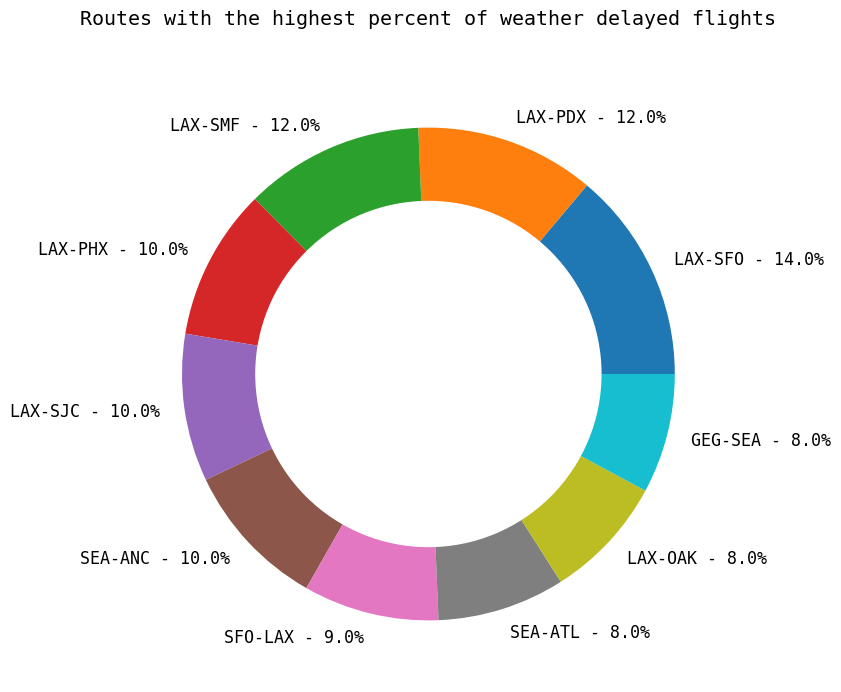

In [48]:
# Which routes are more prone from weather delays
# Percents here are number of flights delayed on a particular route vs all weather delayed flights
weather_delayed = completed_flights[completed_flights['weatherdelay'] != 0]

weather_delayed = weather_delayed['route'].value_counts(
).reset_index().head(10)
delayed_flights = weather_delayed['route'].sum()
weather_delayed['percent'] = (weather_delayed['route'] / delayed_flights)*100

weather_delayed['labels'] = weather_delayed['index'].astype(
    str) + ' - ' + weather_delayed['percent'].round().astype(str) + '%'

# Create a circle at the center of the plot
plt.subplots(figsize=(8, 8))
my_circle = plt.Circle((0, 0), 0.7, color='white')

# Give color names
plt.pie(weather_delayed['percent'], labels=weather_delayed['labels'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Routes with the highest percent of weather delayed flights')

# Show the graph
plt.show()

Observations:
- The top 5 routes with highest percent of weather delayed flights have the origin airport as LAX, Los Angeles.
- Hence, flights departing from LAX are prone to weather delays.
- 3 routes through the SEA airport, Seattle have also made it to the top 10 weather delayed routes. They were – SEA-ANC, SEA-ATL and GEG-SEA.

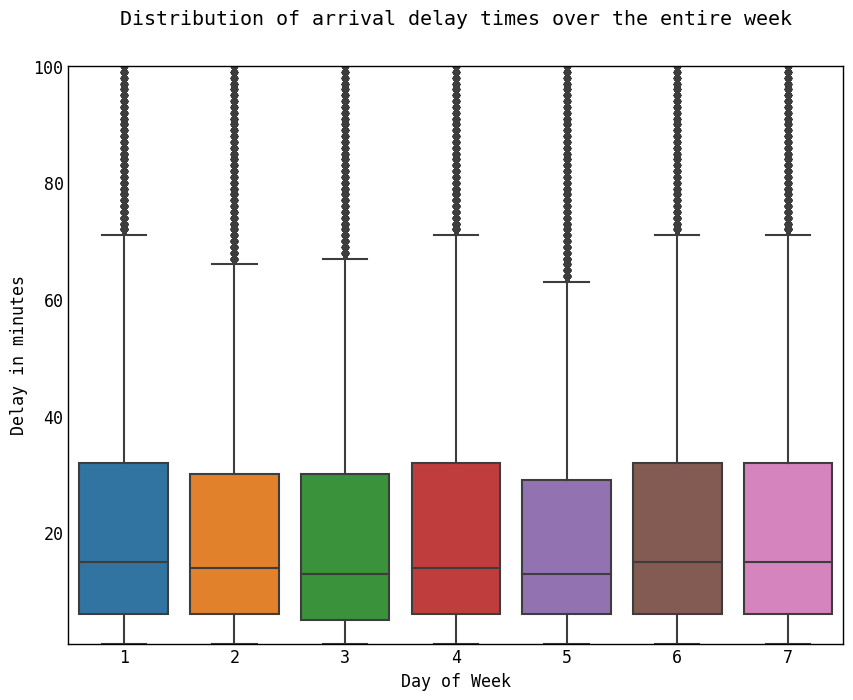

In [49]:
# Which day of week has the highest arrival delays:
delay_flights = completed_flights[completed_flights['arrdelayminutes'] != 0]

fig = plt.subplots(figsize=(10, 7.5))
sns.boxplot(data=delay_flights[delay_flights['arrdelayminutes'].between(
    0.0, 100.0, inclusive='right')], x="dayofweek", y="arrdelayminutes")

plt.xlabel('Day of Week')
plt.ylabel('Delay in minutes')
plt.title('Distribution of arrival delay times over the entire week')
plt.show()

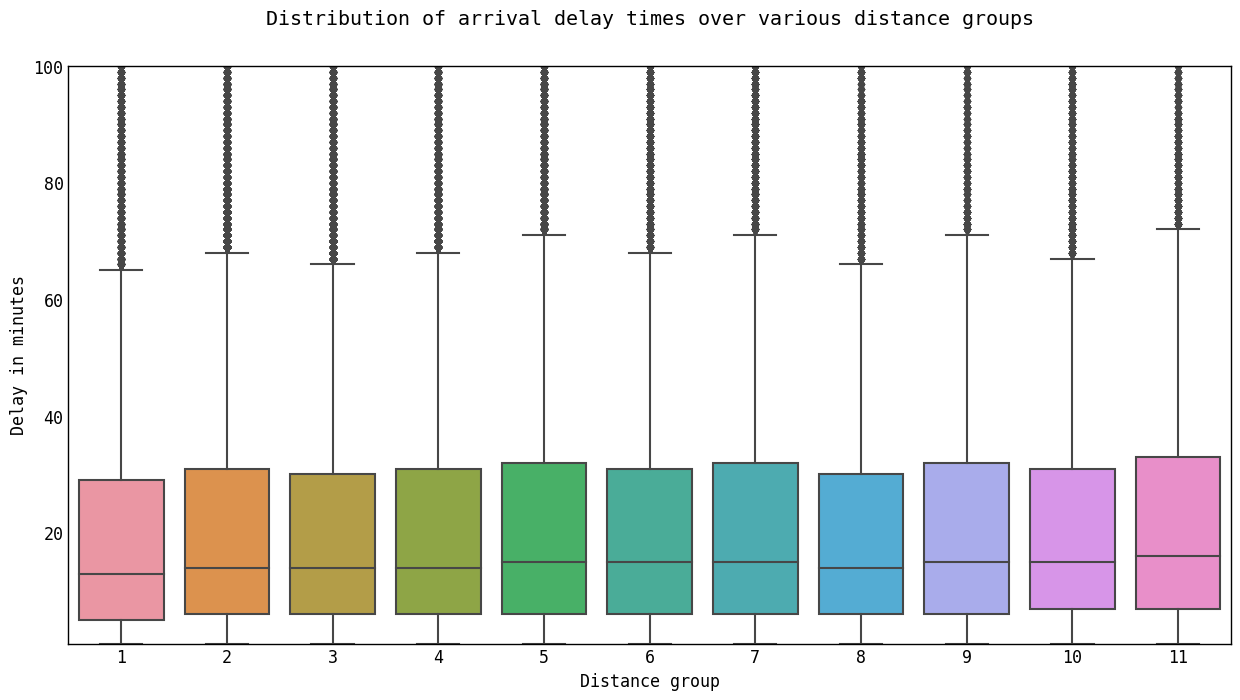

In [50]:
# Which distancegroup has the highest arrival delays:
fig = plt.subplots(figsize=(15, 7.5))
sns.boxplot(data=delay_flights[delay_flights['arrdelayminutes'].between(
    0.0, 100.0, inclusive='right')], x="distancegroup", y="arrdelayminutes")

plt.xlabel('Distance group')
plt.ylabel('Delay in minutes')
plt.title('Distribution of arrival delay times over various distance groups')
plt.show()

Observations:
- There doesn’t appear to be a huge difference in arrival delay times based on which day a flight is landing.
- Day 2 (Tuesday) seems to have the lowest delay times, but the difference in margins with the other days is quite minimal.
- The boxplot of the distribution of arrival delay times over the various distance groups don’t bring out anything significant.
- Distance Group 1 appears to have the lowest arrival delay time but is close to the other distance groups.

# Cancelled flights

In [51]:
cancelled_flights['cancellationcode'].value_counts()

A    10880
B     5458
C      408
D        7
Name: cancellationcode, dtype: int64

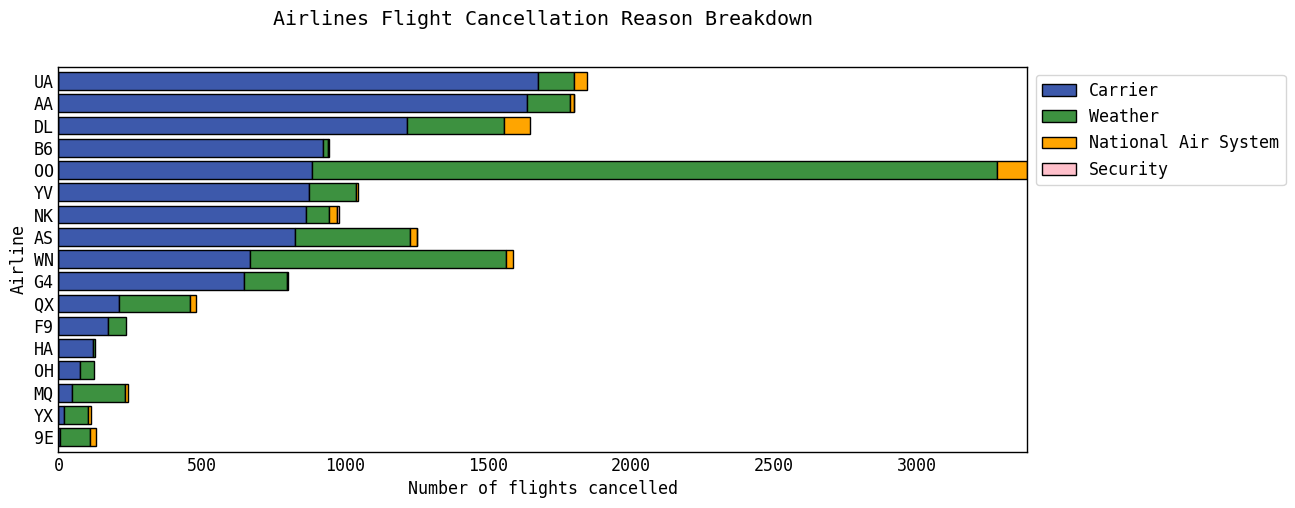

In [53]:
# Airline wise flight cancellations:

col_order = ['A', 'B', 'C', 'D']
cancel_reason = cancelled_flights.groupby('reporting_airline')[
    'cancellationcode'].value_counts().unstack()[col_order]
cancel_reason.fillna(0, inplace=True)
cancel_reason.columns = ['Carrier','Weather','National Air System','Security']

fig, ax = plt.subplots(figsize=(12.5, 5))
cancel_reason.sort_values(by='Carrier').plot(kind='barh', stacked=True,
                                                     ax=ax, width=0.8, color=['#3D59AB', '#3D9140', 'orange', 'pink'],
                                                     edgecolor="black")
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Airlines Flight Cancellation Reason Breakdown")
ax.set_xlabel("Number of flights cancelled")
ax.set_ylabel("Airline")
plt.show()

Observations:
- UA had made the highest number of flight cancellations owing to issues with the carrier.
- A major chunk of the flight cancellations made by OO (around two-thirds) were due to weather issues, which the airline can’t control.
- 9E has the lowest cancellations due to carrier issues out of all the airlines.

In [58]:
# Route wise flight cancellations:
selected_routes = cancelled_flights.route.value_counts().reset_index().head(10)
selected_routes.columns = ['route', 'count']
cancel_reasons = cancelled_flights[cancelled_flights['route'].isin(selected_routes['route'])].groupby('route')[
    'cancellationcode'].value_counts().unstack()[['A', 'B', 'C']]
cancel_reasons.fillna(0, inplace=True)
cancel_reasons.columns = ['Carrier','Weather','National Air System']
cancel_reasons.reset_index(inplace=True)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=cancel_reasons['Carrier'],
    y=cancel_reasons['route'],
    marker=dict(color="crimson", size=12),
    mode="markers",
    name="Carrier",
))

fig.add_trace(go.Scatter(
    x=cancel_reasons['Weather'],
    y=cancel_reasons['route'],
    marker=dict(color="gold", size=12),
    mode="markers",
    name="Weather",
))

fig.add_trace(go.Scatter(
    x=cancel_reasons['National Air System'],
    y=cancel_reasons['route'],
    marker=dict(color="green", size=12),
    mode="markers",
    name="National Air System",
))

fig.update_layout(title=dict(
    text="Route wise flight cancellation reasons",
    x=0.5,
    xref="paper"),
    xaxis_title="Number of cancelled flights",
    yaxis_title="Route")

fig.show()

Observations:
- EWR-MCO route has the highest number of cancellations due to various carrier problems.
- Close to 40 flights were cancelled in the DEN-ASE route because of weather, highest of all routes.

# Conclusion

In [60]:
# Completed:
completed_agg = completed_flights.arrivaldelaygroups_merged.value_counts().reset_index()
completed_agg.columns = ['sub-status', 'num_flights']
completed_agg['flight-status'] = 'Completed'

# Diverted:
diverted_agg = diverted_flights.divreacheddest.value_counts().reset_index()
diverted_agg.columns = ['sub-status', 'num_flights']
diverted_agg['sub-status'].replace({1.0: 'Reached_dest',
                                   0.0: 'Not_Reached_dest'}, inplace=True)
diverted_agg['flight-status'] = 'Diverted'

# Cancelled:
cancelled_agg = cancelled_flights.cancellationcode.value_counts().reset_index()
cancelled_agg.columns = ['sub-status', 'num_flights']
cancelled_agg['sub-status'].replace({'A': 'Carrier', 'B': 'Weather',
                                    'C': 'National Air System', 'D': 'Security'}, inplace=True)
cancelled_agg['flight-status'] = 'Cancelled'

agg_df = pd.concat([completed_agg, diverted_agg, cancelled_agg])
agg_df

,sub-status,num_flights,flight-status
0,early/on_time,879761,Completed
1,small_delay,156519,Completed
2,medium_delay,26545,Completed
3,large_delay,17759,Completed
0,Reached_dest,1671,Diverted
1,Not_Reached_dest,436,Diverted
0,Carrier,10880,Cancelled
1,Weather,5458,Cancelled
2,National Air System,408,Cancelled
3,Security,7,Cancelled


In [61]:
fig = px.treemap(agg_df, path=[px.Constant("All_flights"), 'flight-status', 'sub-status'], values='num_flights',
                  color='num_flights', hover_data=['sub-status'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(agg_df['num_flights'], weights=agg_df['num_flights']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()